In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

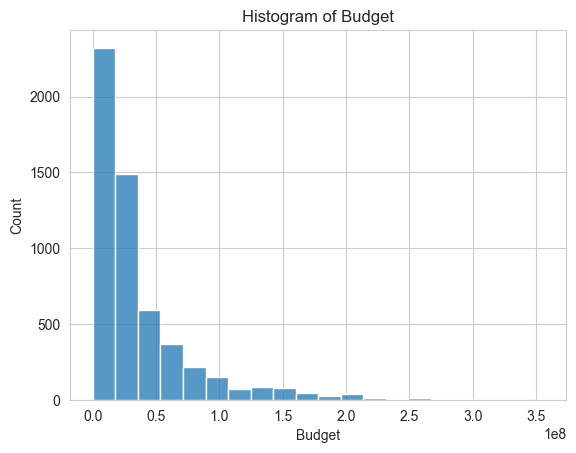

In [22]:
sns.histplot(data=df, x='budget', bins=20)
plt.title("Histogram of Budget")
plt.xlabel("Budget")
plt.show()

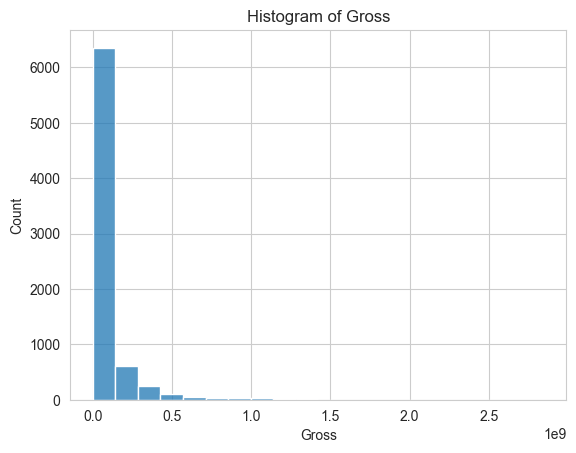

In [23]:
sns.histplot(data=df, x='gross', bins=20)
plt.title("Histogram of Gross")
plt.xlabel("Gross")
plt.show()

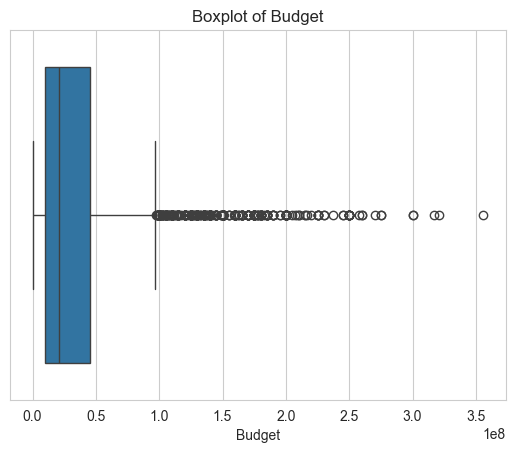

In [24]:
sns.boxplot(x=df['budget'])
plt.title("Boxplot of Budget")
plt.xlabel("Budget")
plt.show()

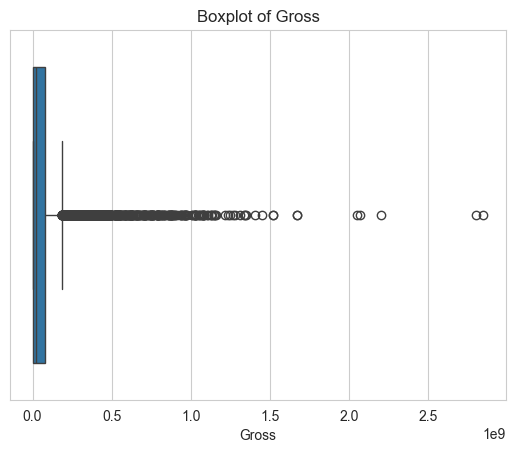

In [25]:
sns.boxplot(x=df['gross'])
plt.title("Boxplot of Gross")
plt.xlabel("Gross")
plt.show()

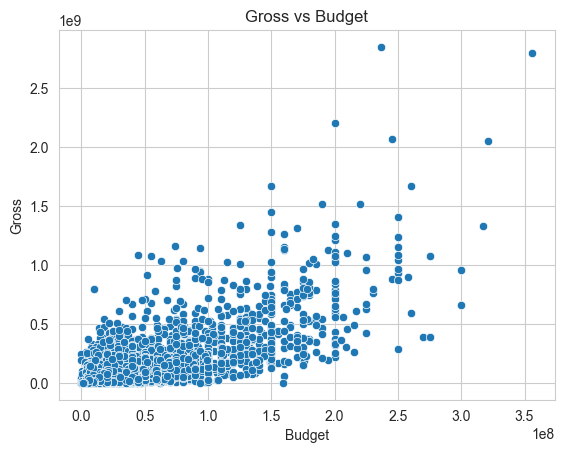

In [26]:
sns.scatterplot(data=df, x='budget', y='gross')
plt.title("Gross vs Budget")
plt.xlabel("Budget")
plt.ylabel("Gross")
plt.show()


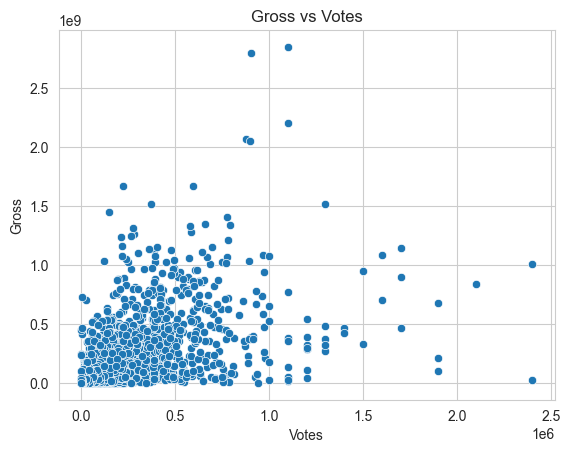

In [28]:
sns.scatterplot(data=df, x='votes', y='gross')
plt.title("Gross vs Votes")
plt.xlabel("Votes")
plt.ylabel("Gross")
plt.show()


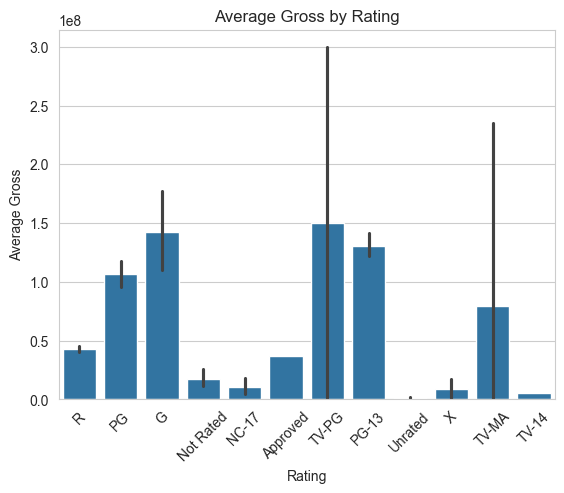

In [31]:
sns.barplot(data=df, x='rating', y='gross', estimator='mean')
plt.title("Average Gross by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Gross")
plt.xticks(rotation=45)
plt.show()

<Axes: >

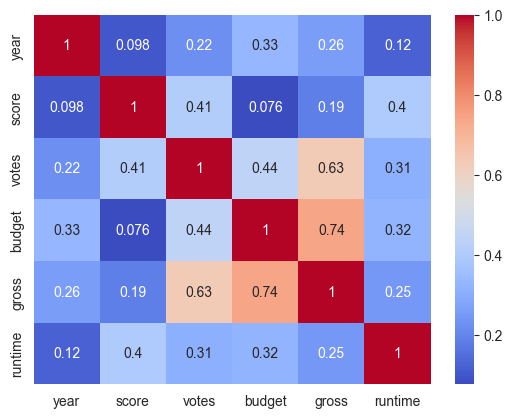

In [32]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

<Axes: >

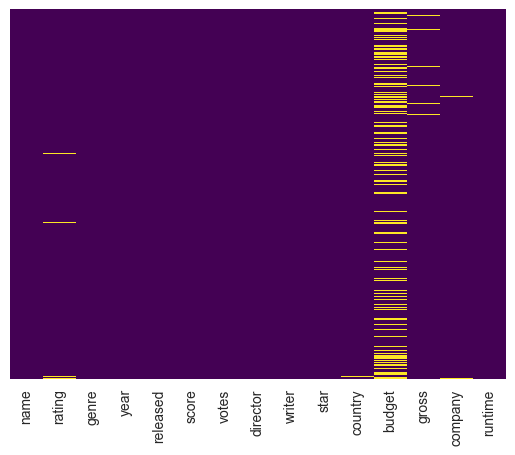

In [33]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [69]:
# Clean and Prepare Data
df_clean = df.dropna(subset=['gross', 'budget', 'score', 'votes']).copy()
df_clean['rating'] = df_clean['rating'].fillna(df_clean['rating'].mode()[0])
df_clean['runtime'] = df_clean['runtime'].fillna(df_clean['runtime'].median())
df_clean['company'] = df_clean['company'].fillna('Unknown')

In [76]:
# Regression features and target
features = ['budget', 'score', 'votes', 'runtime']
target = 'gross'

X = df_clean[features]
y = df_clean[target]

In [77]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [54]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [55]:
# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = root_mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [56]:
# Results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'MAE': [mae_lr, mae_rf],
    'MSE': [mse_lr, mse_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R2 Score': [r2_lr, r2_rf]
})
results

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,5.919524e+07,1.175399e+16,1.084158e+08,0.647026
1,Random Forest Regressor,4.993289e+07,9.530239e+15,9.762294e+07,0.713806


In [34]:
import joblib

joblib.dump(rf_model, "gross_rf_model.pkl")
joblib.dump(scaler, "gross_scaler.pkl")

['gross_scaler.pkl']